In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        
        self.resolution = (xmax-xmin) / num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series): #return true
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_timeseries=False):
        #Grab a random starting point for each batch
        rand_start = np.random.rand(batch_size, 1)
        
        #Convert to be on time series
        #Give a starting point on the time series then we need to create the x axis batch
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        
        #Create batch time series on the x axis
        # batch time series = starting point + 
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        #Create the y data for the time series x axis from previous step
        #sine of batch time series
        y_batch = np.sin(batch_ts)
        
        #Formatting for RNN
        if return_batch_timeseries:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            #return everything along the rows and along the columns - 1
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [3]:
ts_data = TimeSeriesData(250,0,10)
ts_data

In [4]:
ts_data.x_data

array([ 0.        ,  0.04016064,  0.08032129,  0.12048193,  0.16064257,
        0.20080321,  0.24096386,  0.2811245 ,  0.32128514,  0.36144578,
        0.40160643,  0.44176707,  0.48192771,  0.52208835,  0.562249  ,
        0.60240964,  0.64257028,  0.68273092,  0.72289157,  0.76305221,
        0.80321285,  0.84337349,  0.88353414,  0.92369478,  0.96385542,
        1.00401606,  1.04417671,  1.08433735,  1.12449799,  1.16465863,
        1.20481928,  1.24497992,  1.28514056,  1.3253012 ,  1.36546185,
        1.40562249,  1.44578313,  1.48594378,  1.52610442,  1.56626506,
        1.6064257 ,  1.64658635,  1.68674699,  1.72690763,  1.76706827,
        1.80722892,  1.84738956,  1.8875502 ,  1.92771084,  1.96787149,
        2.00803213,  2.04819277,  2.08835341,  2.12851406,  2.1686747 ,
        2.20883534,  2.24899598,  2.28915663,  2.32931727,  2.36947791,
        2.40963855,  2.4497992 ,  2.48995984,  2.53012048,  2.57028112,
        2.61044177,  2.65060241,  2.69076305,  2.73092369,  2.77

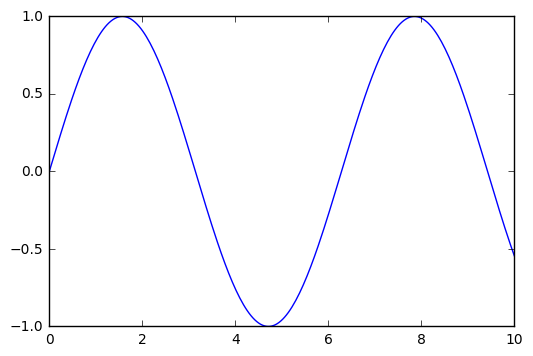

In [5]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [6]:
number_time_steps = 30

In [7]:
y1, y2, ts = ts_data.next_batch(1, number_time_steps, True)

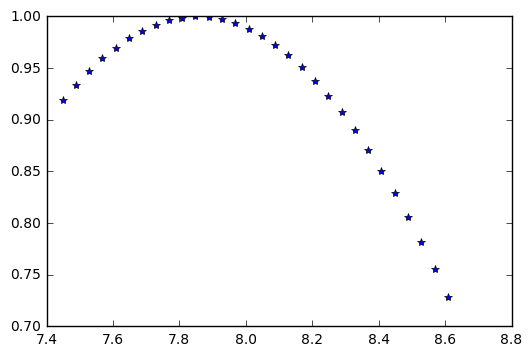

In [8]:
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

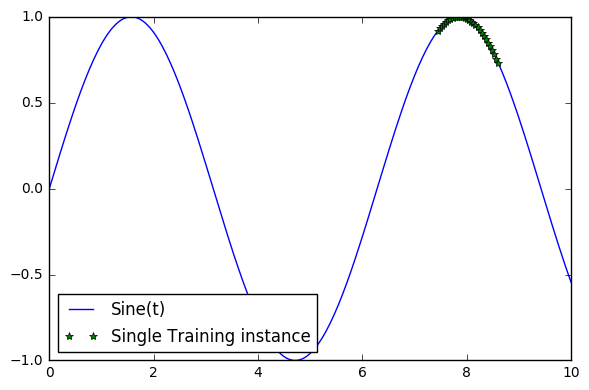

In [9]:
plt.plot(ts_data.x_data, ts_data.y_true, label='Sine(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label='Single Training instance')

plt.legend(loc='lower left')
plt.tight_layout()

In [10]:
#Training data
train_instance = np.linspace(5, 5 + ts_data.resolution*(number_time_steps+1), number_time_steps+1)
train_instance

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

In [11]:
train_instance[:-1]

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667])

In [12]:
ts_data.ret_true(train_instance[:-1])

array([-0.95892427, -0.94638389, -0.93222689, -0.91647747, -0.89916251,
       -0.8803116 , -0.85995695, -0.83813331, -0.81487797, -0.79023066,
       -0.76423348, -0.73693083, -0.70836935, -0.67859784, -0.64766715,
       -0.61563011, -0.58254144, -0.54845769, -0.51343705, -0.47753936,
       -0.44082594, -0.4033595 , -0.36520404, -0.32642474, -0.28708784,
       -0.24726053, -0.20701086, -0.16640756, -0.12552001, -0.08441805])

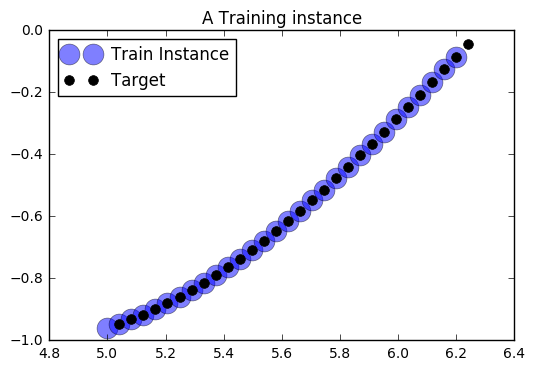

In [13]:
plt.title('A Training instance')

plt.plot(train_instance[:-1], ts_data.ret_true(train_instance[:-1]), 'bo', markersize=15, alpha=0.5, label='Train Instance')
plt.plot(train_instance[1:], ts_data.ret_true(train_instance[1:]), 'ko', markersize=7, label='Target')

plt.legend(loc='upper left')

# Create the model

In [14]:
tf.reset_default_graph()

In [15]:
#Params
num_inputs = 1 # just have 1 feature in this time series
num_neurons = 100
num_outputs = 1

#Network Params
learning_rate = 0.001
epochs = 2000
batch_size = 1

#Placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, number_time_steps, num_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, number_time_steps, num_outputs])

In [16]:
#RNN cell layer
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.GRUCell(num_units=num_neurons, activation=tf.nn.relu),
                                              output_size=num_outputs)

In [17]:
outputs, states = tf.nn.dynamic_rnn(cell=cell, inputs=x, dtype=tf.float32)

In [18]:
#Loss MSE
loss = tf.reduce_mean(tf.square(outputs-y))

#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#Init
init = tf.global_variables_initializer()

In [19]:
#Session
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.85)

In [20]:
saver = tf.train.Saver()

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    
    sess.run(init)
    
    for epoch in range(epochs):
        batch_x, batch_y = ts_data.next_batch(batch_size, number_time_steps)
        
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        if epoch % 100 == 0:
            mse = loss.eval(feed_dict={x:batch_x, y: batch_y})
            print(epoch, '\tMSE', mse)
            
    saver.save(sess, 'rnn_time_series_model/')

0 	MSE 0.51363844
100 	MSE 0.04089744
200 	MSE 0.020423021
300 	MSE 0.01349619
400 	MSE 0.0032550928
500 	MSE 0.0043183635
600 	MSE 0.0012849405
700 	MSE 0.0016052019
800 	MSE 0.0028009682
900 	MSE 0.00057823485
1000 	MSE 0.00021030966
1100 	MSE 0.0004808792
1200 	MSE 8.5690495e-05
1300 	MSE 4.672887e-05
1400 	MSE 8.900922e-05
1500 	MSE 0.0003568457
1600 	MSE 0.00037511525
1700 	MSE 7.246911e-05
1800 	MSE 8.779858e-05
1900 	MSE 2.456377e-05


In [21]:
with tf.Session() as sess:
    
    saver.restore(sess, 'rnn_time_series_model/')
    
    x_new = np.sin(np.array(train_instance[:-1].reshape(-1, number_time_steps, num_inputs)))
    
    y_pred = sess.run(outputs, feed_dict={x: x_new})

INFO:tensorflow:Restoring parameters from rnn_time_series_model/


In [22]:
x_new

array([[[-0.95892427],
        [-0.94638389],
        [-0.93222689],
        [-0.91647747],
        [-0.89916251],
        [-0.8803116 ],
        [-0.85995695],
        [-0.83813331],
        [-0.81487797],
        [-0.79023066],
        [-0.76423348],
        [-0.73693083],
        [-0.70836935],
        [-0.67859784],
        [-0.64766715],
        [-0.61563011],
        [-0.58254144],
        [-0.54845769],
        [-0.51343705],
        [-0.47753936],
        [-0.44082594],
        [-0.4033595 ],
        [-0.36520404],
        [-0.32642474],
        [-0.28708784],
        [-0.24726053],
        [-0.20701086],
        [-0.16640756],
        [-0.12552001],
        [-0.08441805]]])

In [23]:
train_instance[1:]

array([5.04133333, 5.08266667, 5.124     , 5.16533333, 5.20666667,
       5.248     , 5.28933333, 5.33066667, 5.372     , 5.41333333,
       5.45466667, 5.496     , 5.53733333, 5.57866667, 5.62      ,
       5.66133333, 5.70266667, 5.744     , 5.78533333, 5.82666667,
       5.868     , 5.90933333, 5.95066667, 5.992     , 6.03333333,
       6.07466667, 6.116     , 6.15733333, 6.19866667, 6.24      ])

In [24]:
y_pred[0,:,0]

array([-0.92155004, -0.9344956 , -0.91503495, -0.8660325 , -0.8368161 ,
       -0.8201099 , -0.8051477 , -0.78345585, -0.75657964, -0.7287559 ,
       -0.701849  , -0.6752137 , -0.64766085, -0.6186011 , -0.5877207 ,
       -0.55516964, -0.521823  , -0.48785707, -0.4531905 , -0.41790187,
       -0.38202813, -0.34482574, -0.3063178 , -0.26801658, -0.22983235,
       -0.19094783, -0.15159723, -0.11202786, -0.07174867, -0.03118856],
      dtype=float32)

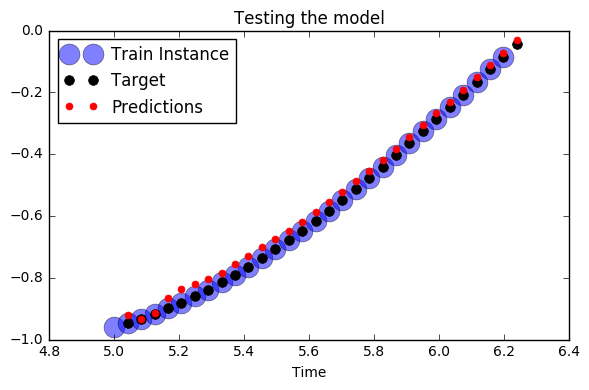

In [25]:
plt.title('Testing the model')

#Training instanse
plt.plot(train_instance[:-1], ts_data.ret_true(train_instance[:-1]), 'bo', markersize=15, alpha=0.5, label='Train Instance')

#Target to predict(correct test values np.sin(train))
plt.plot(train_instance[1:], ts_data.ret_true(train_instance[1:]), 'ko', markersize=7, label='Target')

#Models prediction
plt.plot(train_instance[1:], y_pred[0,:,0], 'r.', markersize=10, label='Predictions')

plt.xlabel('Time')
plt.legend(loc='upper left')
plt.tight_layout()

# Generating new Sequence

In [31]:
with tf.Session() as sess:
    
    saver.restore(sess, 'rnn_time_series_model/')
    
    #Seed zeros
    
    zero_seq_seed = [0.0 for i in range(number_time_steps)]
    
    for epoch in range(len(ts_data.x_data)-number_time_steps):
        
        batch_x = np.array(zero_seq_seed[-number_time_steps:]).reshape(1,number_time_steps,1)
        
        y_pred = sess.run(outputs, feed_dict={x: batch_x})
        
        zero_seq_seed.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from rnn_time_series_model/


In [32]:
zero_seq_seed

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008294504,
 0.017350413,
 0.03008493,
 0.046501204,
 0.06649905,
 0.0899391,
 0.11630278,
 0.14507845,
 0.17624974,
 0.20903033,
 0.24318394,
 0.27818733,
 0.31475097,
 0.35277396,
 0.3918916,
 0.43171576,
 0.47210273,
 0.5128598,
 0.5537327,
 0.59442466,
 0.6340165,
 0.6717289,
 0.7074006,
 0.7410961,
 0.7729135,
 0.80291754,
 0.83113825,
 0.8575498,
 0.88215655,
 0.90496117,
 0.92577535,
 0.944754,
 0.9620997,
 0.9780206,
 0.9926428,
 1.0061992,
 1.0189282,
 1.0310466,
 1.0427525,
 1.0542277,
 1.0656397,
 1.0771444,
 1.0888857,
 1.1010007,
 1.1136206,
 1.1268742,
 1.1408883,
 1.1557888,
 1.1717046,
 1.1887703,
 1.2071234,
 1.2269123,
 1.2482952,
 1.2714423,
 1.2965364,
 1.323778,
 1.3533856,
 1.3855989,
 1.4204422,
 1.4578182,
 1.4978875,
 1.5407915,
 1.5866618,
 1.6356385,
 1.6878599,
 1.742929,
 1.8007

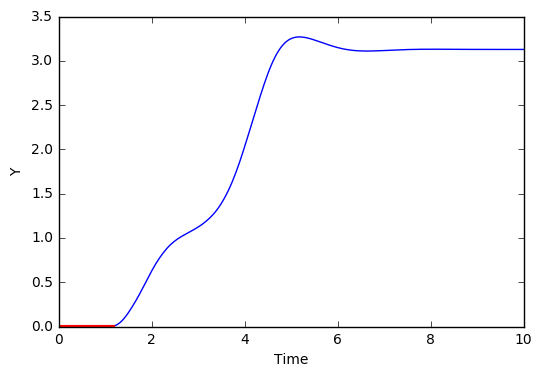

In [33]:
plt.plot(ts_data.x_data, zero_seq_seed, 'b-')
plt.plot(ts_data.x_data[:number_time_steps], zero_seq_seed[:number_time_steps], 'r', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Y')

In [34]:
with tf.Session() as sess:
    
    saver.restore(sess, 'rnn_time_series_model/')
    
    #Seed zeros
    
    train_instance = list(ts_data.y_true[:30])
    
    for epoch in range(len(ts_data.x_data)-number_time_steps):
        
        batch_x = np.array(train_instance[-number_time_steps:]).reshape(1,number_time_steps,1)
        
        y_pred = sess.run(outputs, feed_dict={x: batch_x})
        
        train_instance.append(y_pred[0,-1,0])

INFO:tensorflow:Restoring parameters from rnn_time_series_model/


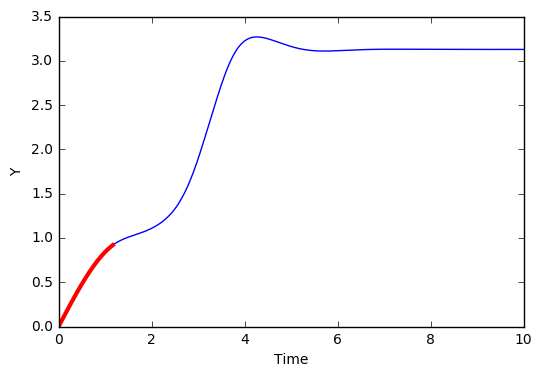

In [35]:
plt.plot(ts_data.x_data, train_instance, 'b-')
plt.plot(ts_data.x_data[:number_time_steps], train_instance[:number_time_steps], 'r', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Y')